# Visualization of Results: MindDial and Theory of Mind in Conversational Agents
This notebook provides the visual analysis for the paper:
**"Do Theory-of-Mind Modules Help? Evaluating MindDial Across Booking and Purchase Scenarios"**.

It includes:
- Distributions of results
- Bar graph visualizations of model performance
- Interpretation of results


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Agents_runs.xlsx')
df

,scenario,run,model,response,category
0,Forgotten purchase,1,NoToM,Sure thing! 🎉 \nSince the current grocery ord...,1
1,Forgotten purchase,1,FirstOrder,FoB: The user believes they still need to purc...,3
2,Forgotten purchase,1,SecondOrder,SoB: The user believes that the existing groce...,2
3,Forgotten purchase,1,FullToM,FoB: The user wants to purchase an additional ...,1
4,Forgotten purchase,2,NoToM,I’m happy to help you order another box of mil...,1
...,...,...,...,...,...
235,Booking,29,FullToM,FoB: The user wants to add a new event—dinner ...,1
236,Booking,30,NoToM,✅ Added: **Dinner with Ana** – Monday at 7 PM\...,2
237,Booking,30,FirstOrder,FoB: The user believes they have a dentist app...,1
238,Booking,30,SecondOrder,SoB: The user thinks dinner with Ana at 7 PM o...,2


In [16]:
order = ['NoToM','FirstOrder',  'SecondOrder', 'FullToM']  

## Distribution of results

In [17]:
scenario = 'Booking'
df_booking = df.loc[df['scenario']==scenario].copy()

print()
print(f"----{scenario}: Percentage distribution----")
print()
summary_booking = (df_booking.loc[df_booking['scenario']==scenario]).groupby(['model','category']).size().unstack(fill_value=0)
summary_pct_booking = summary_booking.div(summary_booking.sum(axis = 1),axis=0) * 100
summary_pct_booking = summary_pct_booking.reindex(order)

print(summary_pct_booking)


scenario = 'Forgotten purchase'
df_purchase = df.loc[df['scenario']==scenario].copy()

print()
print(f"----{scenario}: Percentage distribution----")
print()
summary_purchase = (df_purchase.loc[df_purchase['scenario']==scenario]).groupby(['model','category']).size().unstack(fill_value=0)
summary_pct_purchase = summary_purchase.div(summary_purchase.sum(axis = 1),axis=0) * 100
summary_pct_purchase = summary_pct_purchase.reindex(order)

print(summary_pct_purchase)




----Booking: Percentage distribution----

category             1          2          3
model                                       
NoToM        33.333333  56.666667  10.000000
FirstOrder   56.666667  30.000000  13.333333
SecondOrder  26.666667  50.000000  23.333333
FullToM      50.000000  30.000000  20.000000

----Forgotten purchase: Percentage distribution----

category             1          2          3
model                                       
NoToM        33.333333  20.000000  46.666667
FirstOrder   20.000000  13.333333  66.666667
SecondOrder   3.333333  10.000000  86.666667
FullToM      10.000000   6.666667  83.333333


## Bar graph visualizations of model performance

In [18]:
print()
print('----Mean scores----')
mean_scores = df.groupby(['scenario', 'model'])['category'].mean()
mean_scores_df =mean_scores.reset_index()

mean_scores_pt = mean_scores_df.pivot_table(index='scenario',columns='model',values='category')

pivot_df = mean_scores_df.pivot(index='model', columns='scenario', values='category')
pivot_df = pivot_df.reindex(order)

print(pivot_df)


----Mean scores----
scenario      Booking  Forgotten purchase
model                                    
NoToM        1.766667            2.133333
FirstOrder   1.566667            2.466667
SecondOrder  1.966667            2.833333
FullToM      1.700000            2.733333


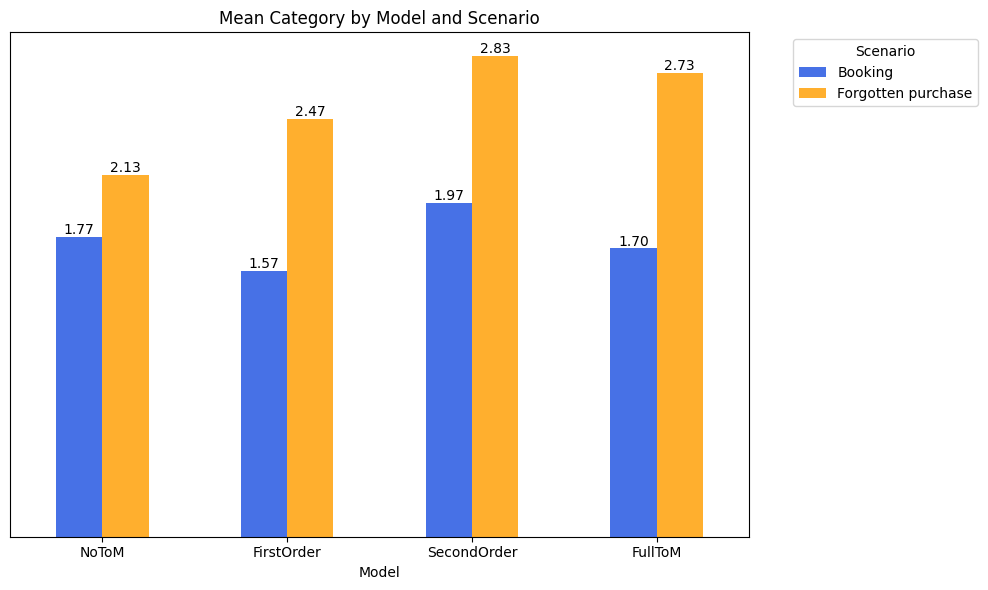

In [ ]:
ax = pivot_df.plot(kind='bar', figsize=(10,6), color=['#4771E6', '#FFAF2E'])
plt.xlabel('Model')
plt.title('Mean Category by Model and Scenario')
plt.xticks(rotation=0)

# Values on top of bars
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',          # value with 2 decimals
        (p.get_x() + p.get_width() / 2, p.get_height()),  # x, y position
        ha='center', va='bottom', fontsize=10
    )

# Legend outside the plot
ax.legend(title='Scenario', bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove y-axis numbers
ax.set_yticks([])
plt.tight_layout()  # adjust layout so nothing is cut off
plt.savefig(f"Mean_Category_Models.png")

plt.show()


## Conclusions

- **Booking scenario**
    - **First-order ToM** showed the highest proportion of **Category 1**
    - **No ToM** achieved the highest proportion of **Category 2** responses
    - **Second-order ToM** produced the highest proportion of **Category 3** responses

- **Forgotten purchase scenario**
    - A greater number of responses were observed in Categories 2 and 3, suggesting improvent conflict detection for explicit misunderstandings.
    - **No ToM** exhibited a notable proportion of **Category 1**
    - **Second-order ToM**  achieved the highest proportion of **Category 3** responses, followed by **Full ToM**